In [33]:
import numpy as np
from functools import partial
import matplotlib.pyplot as plt 
from IPython.display import HTML
plt.rc('font', size=14) # makes the fonts used in graphs a bit larger (and clearer)!

In [34]:
# define the A,B,O step function
def A_step( qp , h):
    q,p = qp 
    q = q + h*p
    return [q, p]

def B_step( qp, h, force) :
    q,p = qp
    F = force(q)
    p = p + h*F
    return [q, p]

def O_step( qp, h, gamma, beta ):
    q,p = qp
    alpha = np.exp(-h*gamma)
    R = np.random.random( q.size).reshape(q.shape)
    p = p * alpha + np.sqrt((1-alpha*alpha)/beta) * R
    return [q,p]


In [35]:
# implement the BAOAB method
def ld_BAOAB(q, p, h, gamma, beta, force):
    
    qp = [q, p]
    qp_B = B_step(qp, h/2, force)
    qp_BA = A_step(qp_B, h/2)
    qp_BAO = O_step(qp_BA, h, gamma, beta)
    qp_BAOA = A_step(qp_BAO, h/2)
    qp_BAOAB = B_step(qp_BAOA, h/2, force)
    q,p = qp_BAOAB
    return q, p


In [43]:
def run_simulation(q0, p0, Nsteps, h, gamma, beta, step_function, force_function):
    q_traj = [np.copy(q0)]
    p_traj = [np.copy(p0)]
    t_traj = [0]

    q = np.copy(q0)
    p = np.copy(p0)
    t = 0
    
    for n in range(Nsteps):
        q,p = step_function(q, p, h, gamma, beta, force_function)
        t = t + h
        
        q_traj += [q]
        p_traj += [p]
        t_traj += [t]
        
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj)
    t_traj = np.array(t_traj)
    
    return q_traj, p_traj, t_traj


In [92]:
def force_lan(q):
    #F =  - q**2/2 + q**4/4 ######
    F = -q + q**3
    return F

def init_toplot(gamma):

    q0 = np.random.randn(1)
    p0 = np.random.randn(1)

    Nsteps = 1000
    h = 0.1
    gamma = 1.0
    beta = 1.0

    # Run one long trajectory of Nsteps, using the BAOAB scheme
    q_traj, p_traj, t_traj = run_simulation(q0, p0, Nsteps , h, gamma, beta, ld_BAOAB, force_lan)

NameError: name 'step_function' is not defined

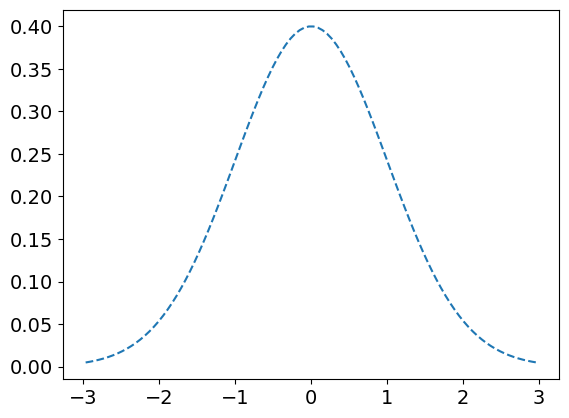

In [93]:
histogram,bins = np.histogram(q_traj,bins=100,range=[-3,3], density=True)

midx = (bins[0:-1]+bins[1:])/2
#rho = np.exp(- midx**2/2 + midx**4/4)
rho = np.exp(- beta*(midx**2)/2)
rho = rho / ( np.sum(rho) * (midx[1]-midx[0]) ) # Normalize rho by dividing by its approx. integral
#plt.plot(midx,histogram,label='Experiment')
plt.plot(midx,rho,'--',label='Truth')

gamma = 10
friction = [0.0001,0.001,0.01,0.1,1,10]

for gamma in friction:
    x = run_simulation(q0, p0, Nsteps, h, gamma, beta, step_function, force_function)
    plt.plot(midx,rho,'--',label=f'gamma={gamma}', density=True)

plt.title('Distribution of $q$')
plt.xlabel('$q$')
plt.ylabel('Density')
plt.legend()